In [8]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])

# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot:>

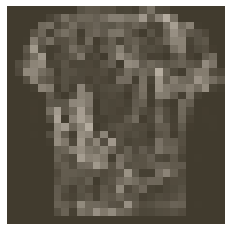

In [9]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

In [10]:
%matplotlib inline
%config InlinBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

from torch import nn
from torch import optim
import torch.nn.functional as F

In [11]:
image[0,:].size()

torch.Size([1, 28, 28])

In [21]:
from collections import OrderedDict

# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [22]:
epochs = 5
steps = 0
print_every = 40

for e in range(epochs):

    running_loss = 0

    for images, labels in trainloader:
        images.resize_(images.size()[0],28*28)

        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))

            running_loss = 0

Epoch: 1/5...  Loss: 0.0571
Epoch: 1/5...  Loss: 0.0581
Epoch: 1/5...  Loss: 0.0575
Epoch: 1/5...  Loss: 0.0573
Epoch: 1/5...  Loss: 0.0575
Epoch: 1/5...  Loss: 0.0572
Epoch: 1/5...  Loss: 0.0563
Epoch: 1/5...  Loss: 0.0570
Epoch: 1/5...  Loss: 0.0576
Epoch: 1/5...  Loss: 0.0565
Epoch: 1/5...  Loss: 0.0570
Epoch: 1/5...  Loss: 0.0565
Epoch: 1/5...  Loss: 0.0566
Epoch: 1/5...  Loss: 0.0570
Epoch: 1/5...  Loss: 0.0567
Epoch: 1/5...  Loss: 0.0565
Epoch: 1/5...  Loss: 0.0564
Epoch: 1/5...  Loss: 0.0560
Epoch: 1/5...  Loss: 0.0561
Epoch: 1/5...  Loss: 0.0562
Epoch: 1/5...  Loss: 0.0556
Epoch: 1/5...  Loss: 0.0559
Epoch: 1/5...  Loss: 0.0559
Epoch: 1/5...  Loss: 0.0556
Epoch: 1/5...  Loss: 0.0559
Epoch: 1/5...  Loss: 0.0560
Epoch: 1/5...  Loss: 0.0560
Epoch: 1/5...  Loss: 0.0555
Epoch: 1/5...  Loss: 0.0555
Epoch: 1/5...  Loss: 0.0554
Epoch: 1/5...  Loss: 0.0556
Epoch: 1/5...  Loss: 0.0550
Epoch: 1/5...  Loss: 0.0558
Epoch: 1/5...  Loss: 0.0552
Epoch: 1/5...  Loss: 0.0552
Epoch: 1/5...  Loss:

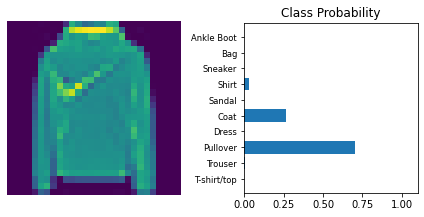

In [34]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

img = img.resize_(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps,version='Fashion')